# 비지도 학습 소개

# 1.환경준비

## (1) 라이브러리 로딩

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## (2) Data Loading

In [7]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/customer_segmentation.csv'
data = pd.read_csv(path)
data.head()

,CustID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2.데이터 전처리

## (1) 데이터 분할

In [10]:
# 군집화는 아래 변수들만 사용합니다.
x = data.loc[:, ['Age', 'Income', 'Score']]

In [11]:
x

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## (2) 스케일링

In [13]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

In [14]:
x_s

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

# 3.클러스터링

## (1)  k-means 모델 만들기
* k값을 늘려가면서(2~20) 모델을 만들고, inertia 값 혹은 실루엣 점수를 저장합니다.
* 그래프를 통해서 최적의 k값을 결정합니다.
    * 단, k값은 3~6개 사이에서 결정하세요.
* 선정된 k값으로 모델을 생성합니다.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # x , y예측 을 값으로 받음 


In [18]:
k_values = range(2,21)

inertias = []
sil_score = []
for k in k_values:
    model = KMeans(n_clusters = k , n_init = 'auto')

    pred = model.fit_predict(x_s) 
    # model.fit(x_s) # 정규화 
    # pred = model.predict(x_s)# 정규화
    
    inertias.append(model.inertia_) # 군집간 거리 측정
    sil_score.append(silhouette_score(x_s,pred)) # 군집간 실루엣 점수


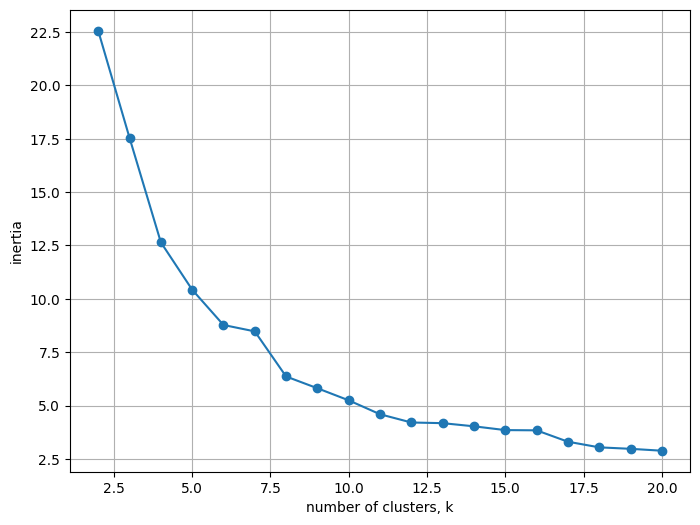

In [19]:
# Plot k vs inertias
plt.figure(figsize = (8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()


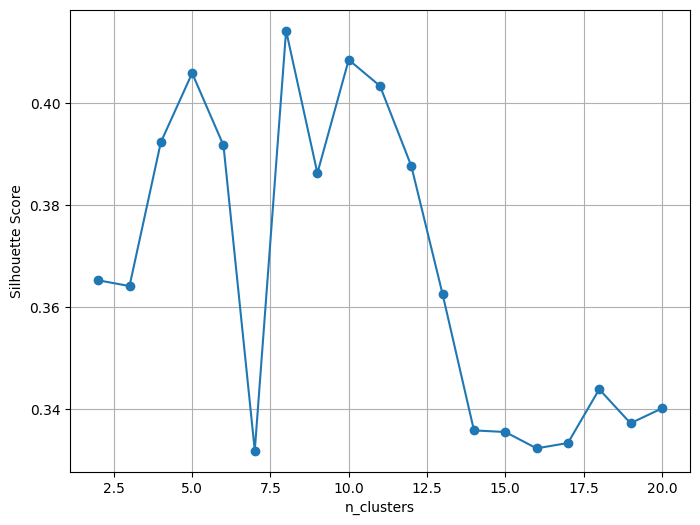

In [20]:
# Plot k vs siluet
plt.figure(figsize = (8, 6))
plt.plot(k_values, sil_score, marker='o')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [21]:
# 최적의 군집은 k = 5 임을 알 수 있음 
# 적절힌 k 설정해서 다시 모델링 
model = KMeans(n_clusters= 5, n_init = 'auto')
model.fit(x_s)
pred = model.predict(x_s)

## (2) 데이터 군집 결과 정리
* 데이터를 군집화 하여 기존 데이터와 합치기
    * pd.concat([data, pred], axis = 1)

In [24]:
# 예측
pred = model.predict(x_s)

# 예측 결과를 데이터프레임으로 만들고
pred = pd.DataFrame(pred, columns = ['Cluster'])

# 원본 데이터와 합치기
result = pd.concat([data,pred], axis = 1)

# 예측 결과는 카테고리 타입으로 변경
result['Cluster'] = result['Cluster'].astype('category')



In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CustID   200 non-null    int64   
 1   Gender   200 non-null    object  
 2   Age      200 non-null    int64   
 3   Income   200 non-null    int64   
 4   Score    200 non-null    int64   
 5   Cluster  200 non-null    category
dtypes: category(1), int64(4), object(1)
memory usage: 8.3+ KB


In [28]:
result

,CustID,Gender,Age,Income,Score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


# 4.후속 분석
* 군집별 특징을 분석해 봅시다.

## (1) 군집별 변수 비교
* 활용 가능한 차트 : sns.barplot, sns.kdeplot, sns.boxplot, mosaic

### 1) Age

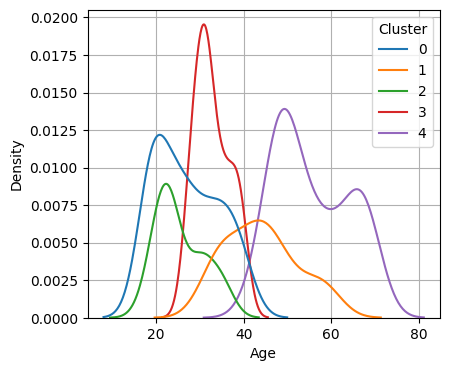

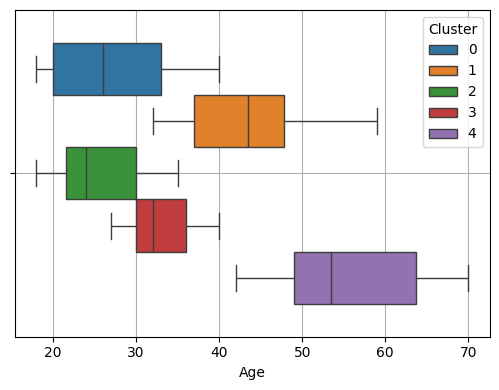

In [42]:
# 범주 -> 수치 
feature = 'Age'

plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
sns.kdeplot(x=feature, data = result , hue ='Cluster')
plt.grid()

plt.figure(figsize =(10,4))
plt.subplot(1,2,2)
sns.boxplot(x=feature, data = result , hue ='Cluster')
plt.grid()

plt.tight_layout()
plt.show()

### 2) Income

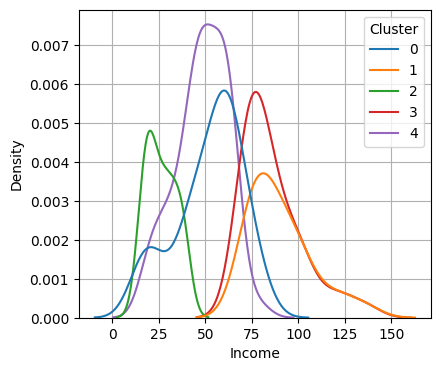

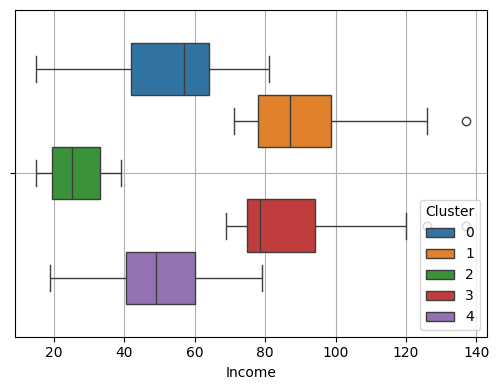

In [44]:
feature = 'Income'
plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
sns.kdeplot(x=feature, data = result , hue ='Cluster')
plt.grid()

plt.figure(figsize =(10,4))
plt.subplot(1,2,2)
sns.boxplot(x=feature, data = result , hue ='Cluster')
plt.grid()

plt.tight_layout()
plt.show()

### 3) Score

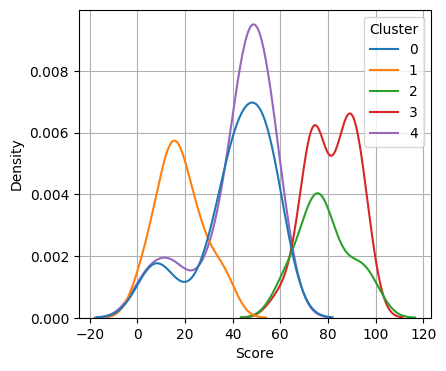

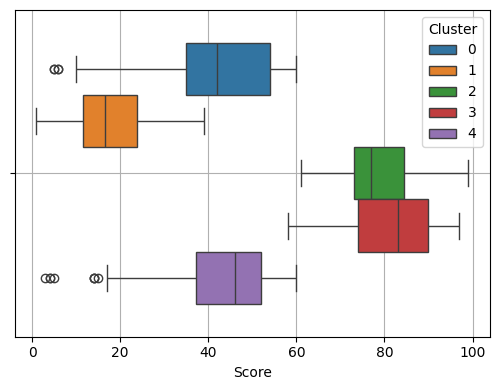

In [46]:
feature = 'Score'
plt.figure(figsize =(10,4))
plt.subplot(1,2,1)
sns.kdeplot(x=feature, data = result , hue ='Cluster')
plt.grid()

plt.figure(figsize =(10,4))
plt.subplot(1,2,2)
sns.boxplot(x=feature, data = result , hue ='Cluster')
plt.grid()

plt.tight_layout()
plt.show()

### 4) Gender
* 모자익 플롯을 사용해 봅시다.

In [50]:
from statsmodels.graphics.mosaicplot import mosaic

(<Figure size 640x480 with 3 Axes>,
 {('0', 'Male'): (0.0, 0.0, 0.24019607843137253, 0.4068072411688928),
  ('0', 'Female'): (0.0,
   0.4101295003051054,
   0.24019607843137253,
   0.5898704996948945),
  ('1', 'Male'): (0.24509803921568626,
   0.0,
   0.1470588235294118,
   0.5315614617940199),
  ('1', 'Female'): (0.24509803921568626,
   0.5348837209302325,
   0.1470588235294118,
   0.46511627906976744),
  ('2', 'Male'): (0.3970588235294118,
   0.0,
   0.11274509803921567,
   0.390004333381482),
  ('2', 'Female'): (0.3970588235294118,
   0.39332659251769464,
   0.11274509803921567,
   0.6066734074823054),
  ('3', 'Male'): (0.5147058823529412,
   0.0,
   0.19607843137254896,
   0.4485049833887043),
  ('3', 'Female'): (0.5147058823529412,
   0.45182724252491696,
   0.19607843137254896,
   0.5481727574750831),
  ('4', 'Male'): (0.7156862745098039,
   0.0,
   0.2843137254901961,
   0.42960247451025313),
  ('4', 'Female'): (0.7156862745098039,
   0.4329247336464658,
   0.2843137254901961,
 

<Figure size 1000x400 with 0 Axes>

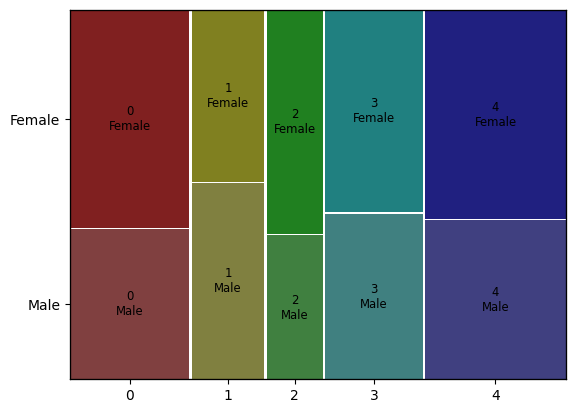

In [64]:
feature = 'Gender'
plt.figure(figsize =(10,4))
mosaic(result.sort_values('Cluster') , ['Cluster',feature])
plt.axhline

## (2) 한꺼번에 비교하기
* sns.pairplot을 이용하여 한꺼번에 비교해 봅시다.

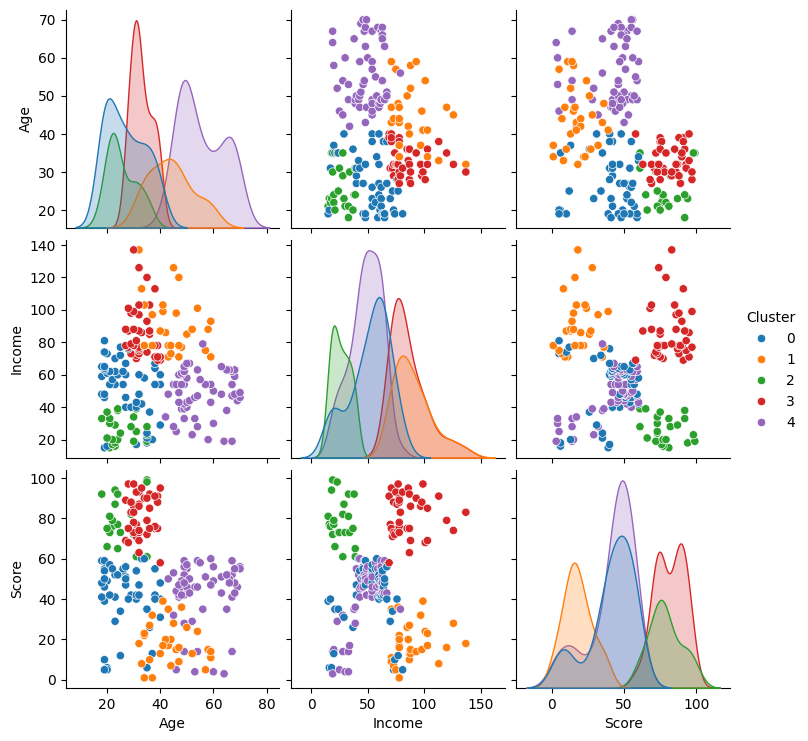

In [68]:
# 'Age', 'Income', 'Score', 'pred'만 추출
sns.pairplot(result[['Age', 'Income', 'Score', 'Cluster']],hue='Cluster')
plt.show()

## (3) 각 군집별 특징을 정리해 봅시다.
* 각 군집의 특징(다른 군집과 차별화 되는 요소)을 정리합시다.
* 각 군집의 특징으로 볼 때, 어떤 고객군이라고 볼 수 있을까요?
* 각 고객군에 대한 적절한 마케팅 방법은?
* 더 필요한 정보는?